Dataset : https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ratings = pd.read_csv('/content/ratings.csv')
movies = pd.read_csv('/content/movies.csv')

In [ ]:
print(ratings)
print("#########################################")
ratings.info()


       userId  movieId  rating    timestamp
0           1        1     4.0  964982703.0
1           1        3     4.0  964981247.0
2           1        6     4.0  964982224.0
3           1       47     5.0  964983815.0
4           1       50     5.0  964982931.0
...       ...      ...     ...          ...
85266     554     2243     3.0  944902081.0
85267     554     2282     5.0  944902251.0
85268     554     2324     5.0  944898992.0
85269     554     2396     5.0  944898992.0
85270     554      249     NaN          NaN

[85271 rows x 4 columns]
#########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85271 entries, 0 to 85270
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     85271 non-null  int64  
 1   movieId    85271 non-null  int64  
 2   rating     85270 non-null  float64
 3   timestamp  85270 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 2.6 MB


In [ ]:
print(movies)
print("###################################")
movies.info()

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [ ]:
sum(ratings['movieId']==1)

188

In [ ]:
ratings[ratings['movieId']==1]['rating'].mean()

3.9335106382978724

In [ ]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5, nan])

In [ ]:
ratings['rating'].nunique()

10

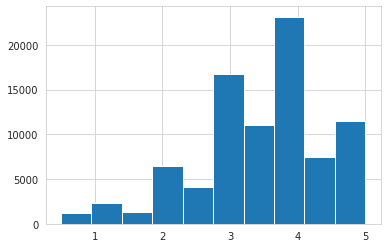

In [ ]:
_ = plt.hist(ratings['rating'],bins=10)

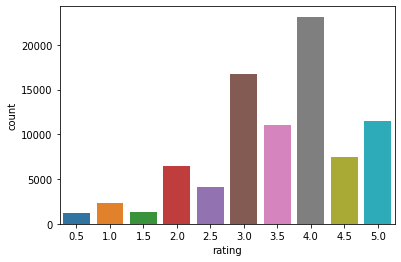

In [ ]:
sns.countplot(x='rating',data=ratings)

In [ ]:
ratings['userId'].nunique()

554

In [ ]:
movies['title'].nunique()

9737

In [ ]:
sum(movies['title'].value_counts()==2)

5

In [ ]:
movies['title'].value_counts()==2

Emma (1996)                                True
War of the Worlds (2005)                   True
Confessions of a Dangerous Mind (2002)     True
Eros (2004)                                True
Saturn 3 (1980)                            True
                                          ...  
Lost and Delirious (2001)                 False
Rape Me (Baise-moi) (2000)                False
Alice (1990)                              False
Another Woman (1988)                      False
Andrew Dice Clay: Dice Rules (1991)       False
Name: title, Length: 9737, dtype: bool

In [ ]:
data = pd.merge(ratings,movies,on='movieId')

In [ ]:
data.head(500)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
495,505,47,5.0,1.298780e+09,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
496,507,47,3.0,8.389647e+08,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
497,512,47,5.0,8.414494e+08,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
498,514,47,4.0,1.533872e+09,Seven (a.k.a. Se7en) (1995),Mystery|Thriller


In [ ]:
data['title'].nunique()

8753

In [ ]:
data.groupby('title')['rating'].count()

title
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
'Tis the Season for Love (2015)               1
                                             ..
eXistenZ (1999)                              17
xXx (2002)                                   22
xXx: State of the Union (2005)                4
¡Three Amigos! (1986)                        22
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 8753, dtype: int64

In [ ]:
stats = pd.DataFrame(data.groupby('title')['rating'].mean(),columns = ['rating'])
stats

,rating
title,
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
'Tis the Season for Love (2015),1.500000
...,...
eXistenZ (1999),3.823529
xXx (2002),2.772727
xXx: State of the Union (2005),2.125000


In [ ]:
stats['count'] = data.groupby('title')['rating'].count()
stats

,rating,count
title,,
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
...,...,...
eXistenZ (1999),3.823529,17
xXx (2002),2.772727,22
xXx: State of the Union (2005),2.125000,4


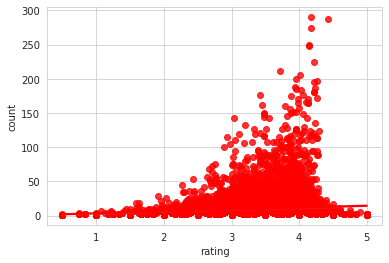

In [ ]:
sns.set_style('whitegrid')
sns.regplot(x='rating',y='count',data = stats,color='r')

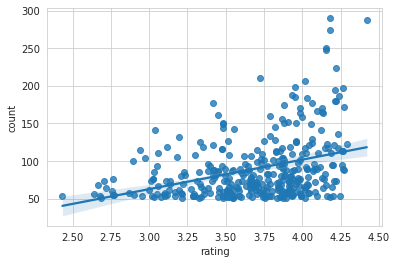

In [ ]:
sns.regplot(x='rating',y='count',
            data = stats[stats['count']>50])

In [ ]:
stats.sort_values(by='count',ascending=False).head(10)

,rating,count
title,,
Forrest Gump (1994),4.181034,290
"Shawshank Redemption, The (1994)",4.419861,287
Pulp Fiction (1994),4.177007,274
"Matrix, The (1999)",4.152000,250
"Silence of the Lambs, The (1991)",4.151210,248
Star Wars: Episode IV - A New Hope (1977),4.216518,224
Jurassic Park (1993),3.722749,211
Braveheart (1995),4.014563,206
Terminator 2: Judgment Day (1991),3.949749,199


In [ ]:
pivot = data.pivot_table(index='userId',
                         columns='title',
                         values='rating')

In [ ]:
pivot

title,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot['Matrix, The (1999)'].head(10)

userId
1     5.0
2     NaN
3     NaN
4     1.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    0.5
Name: Matrix, The (1999), dtype: float64

In [ ]:
inp = 'Matrix, The (1999)'

In [ ]:
sim_inp = pivot.corrwith(pivot[inp])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
sim_inp

title
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
'Tis the Season for Love (2015)                   NaN
                                               ...   
eXistenZ (1999)                             -0.083315
xXx (2002)                                   0.565670
xXx: State of the Union (2005)               0.943880
¡Three Amigos! (1986)                        0.029906
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 8753, dtype: float64

In [ ]:
sim_inp = pd.DataFrame(sim_inp,columns = ['similarity'])
sim_inp['count'] = stats['count']

In [ ]:
sim_inp.head()

,similarity,count
title,,
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2
'Tis the Season for Love (2015),NaN,1


In [ ]:
sim_inp[sim_inp['count']>30].sort_values(by = 'similarity',ascending=False)

,similarity,count
title,,
"Matrix, The (1999)",1.000000,250
Tin Cup (1996),0.772338,37
Tommy Boy (1995),0.722603,42
The Butterfly Effect (2004),0.661771,41
Interstellar (2014),0.635180,63
...,...,...
"Maltese Falcon, The (1941)",-0.343444,37
Species (1995),-0.347571,36
"River Wild, The (1994)",-0.378332,37
